# Práctica 1. Aprendizaje automático

Grupo 16: Adina Han, Diego Ambite 

### 1. Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, su distribución y su correlación.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

In [52]:
 data_crimes = pd.read_csv('USArrests.csv', index_col = 0)  

In [53]:
data_crimes.keys()

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

Tabla con el nombre de las variables

In [54]:
df = pd.DataFrame(data=data_crimes) 
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Tabla de estadísticos descriptivos de cada variable

In [55]:
df.describe()
#std -> standard deviation , a measure of a distribution of the array elements

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Tabla de tipos de las variables

In [56]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

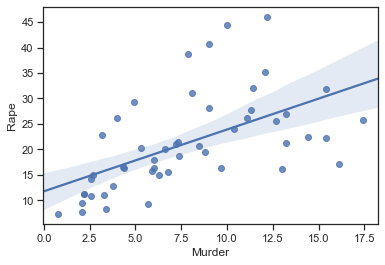

In [57]:
sns.regplot(x="Murder", y = "Rape", data=data_crimes)

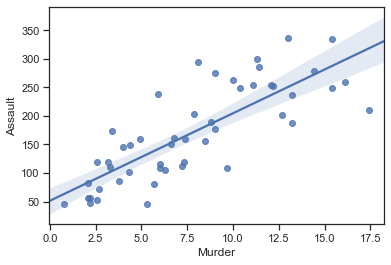

In [58]:
sns.regplot(x="Murder", y = "Assault", data=data_crimes)

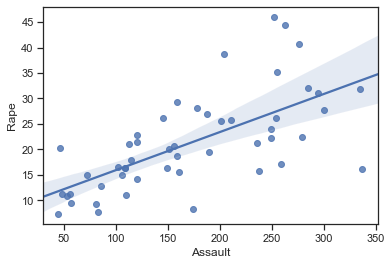

In [59]:
sns.regplot(x="Assault", y = "Rape", data=data_crimes)

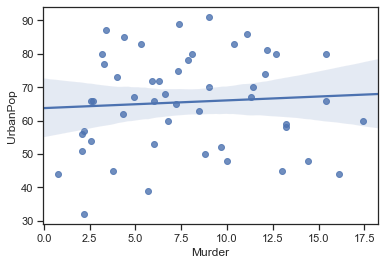

In [60]:
sns.regplot(x="Murder", y = "UrbanPop", data=data_crimes)

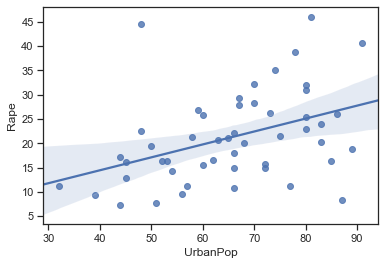

In [61]:
sns.regplot(x="UrbanPop", y = "Rape", data=data_crimes)

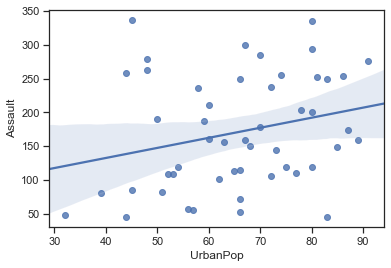

In [62]:
sns.regplot(x="UrbanPop", y = "Assault", data=data_crimes)

#### Este Dataset contiene estadísticas sobre los arrestos realizados en los 50 estados de EEUU, en el año 1973. En particular para los delitos de Asesinato, Asalto y Violación además de incluir la población urbana de esos estados. 

#### Lo primero que nos encontramos en los datos es que el rango difiere mucho entre algunas variables. Esto puede llevar a que una variable pese más que otras o puede introducir ruido en los datos.

#### La desviación típica, nos indica que Murder, Rape y UrbanPop están agrupados en torno a su valor medio. En cambio la desviación típica de Assault nos dice que presenta valores atípicos alejados de la media que hace que los datos se extiendan sobre un rango mayor que el resto.

#### Otra conclusión que se puede obtener mediante las scatter plots usando la regresión (para obtener una idea de la correlación entre las distintas variables estadísticas) es que para Murder y Assault están muy correlacionadas ya que el crecimiento de una conlleva el crecimiento de la otra quedando agrupadas cerca de la linea de regresión lineal.

#### En cambio, para los otros pares de variables (Murder/Rape y Assault/Rape) sigue habiendo una correlación relativamente fuerte, pero son más comunes los casos en los que una variable tiene un valor muy alto para una componente y bajo para la otra, es decir casos con poca correlación entre ellas.

#### Finalmente comprobando las Scatter Plots de los delitos respecto a la UrbanPop no se puede afirmar que exista una corralación, es decir una mayor población urbana no conlleva un mayor número de delitos, haciendo que haya pocos puntos cerca de la linea de regresión lineal, y estando muy distribuidos por toda la gráfica.


### 2. Considera si debes re‐escalar las variables antes y el tipo de escalado que usas. Razona tu elección.

In [63]:
scaler = StandardScaler()
array_data = scaler.fit_transform(data_crimes)
data_crimes_standardized = pd.DataFrame(array_data)
data_crimes_standardized

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


#### Como hemos comentado anteriormente el rango de las variables difiere y por eso hay que transformar las variables iniciales, cambiando la escala de representación de estas y también para tener una mayor homogeneidad.
#### Para obtenr una mayor homogeneidad en los datos, hemos decidido reescalar las variables ya que algunas como Assault tiene un límite superior muy elevado (335) comparado con el limite superior de Muder que tiene (17.4).

#### El tipo de escalado que hemos usado es el escalado estarndard (Standard Scaler) el cual a cada dato le resta la media de la variable y el resultado lo divide por la desviación típica. La media y la desviación típica son sensibles a valores atípicos, pero aun así el impacto del ruido de estos valores queda disminuido.


### 3. Aplica un algoritmo de clustering de los que hemos visto en clase con una parametrización (el valor de k en el algoritmo de k‐medias, o la forma en la que se agrupan clusters en el caso jerárquico).

### Determina el número de clusters que consideras adecuado para el conjunto de datos y justifica tu elección.

#### En primer lugar, y debido a que nuestro dataset contiene un total de 4 métricas, de las cuales realmente son 3 las que tienen mayor interes, puesto que en la sección anterior ya hemos visto que el impacto de UrbanPop no es realmente significativo, lo que vamos a hacer es mostrarlas en parejas. De esta manera vamos a tener una idea aproximada de cual es la distribución de cada una y poder percibir si se puede hacer una primera estimación del número de clusters que vamos a tener.

#### Murder / Rape

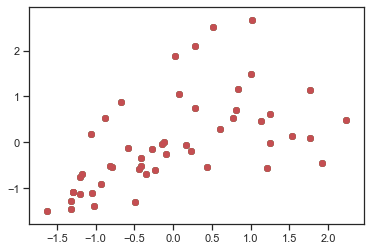

In [64]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[0], data_crimes_standardized[3])

#### Murder / Assault

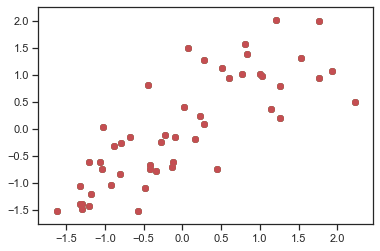

In [65]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[0], data_crimes_standardized[1])

#### Assault / Rape

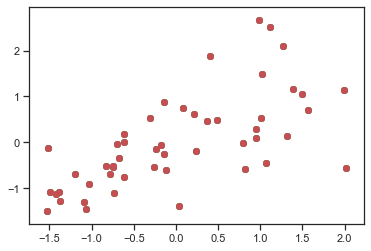

In [66]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[1], data_crimes_standardized[3])

In [67]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

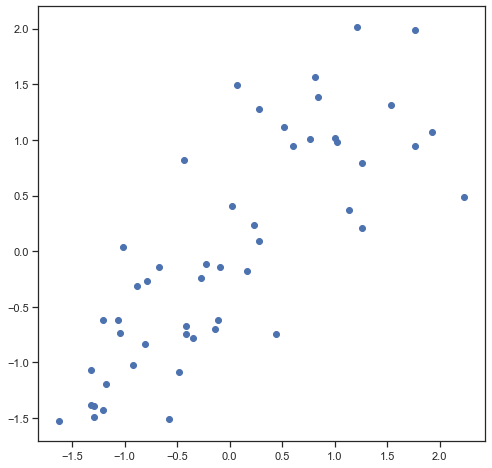

In [68]:
plot_clusters(array_data)

#### Como podemos observar en las tres gráficas no hay una distribución que permita afimar que hay un número claro de clusters, por lo tanto recurrimos a otras tecnicas para calcular el número de clusters que debemos emplear.

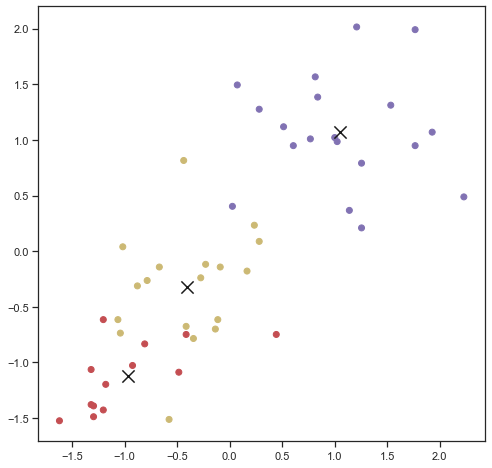

In [69]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=3, random_state=333)

# Agrupar los puntos en clusters
km.fit(data_crimes_standardized)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

plot_clusters(array_data, labels, centers)

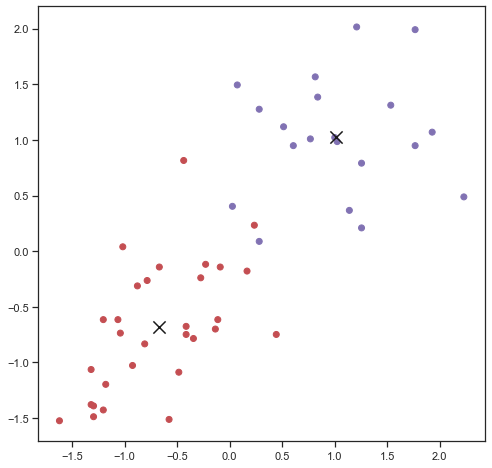

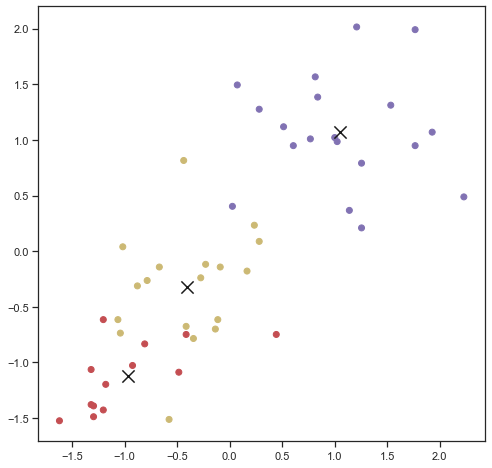

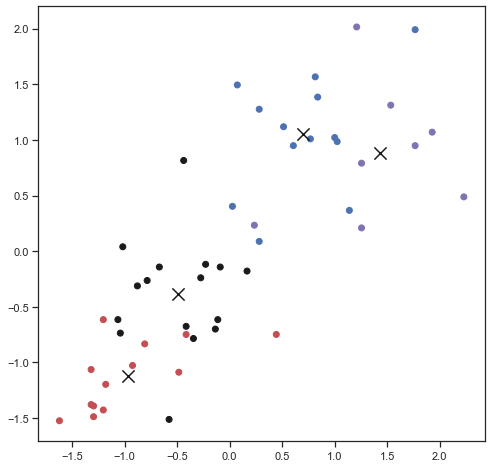

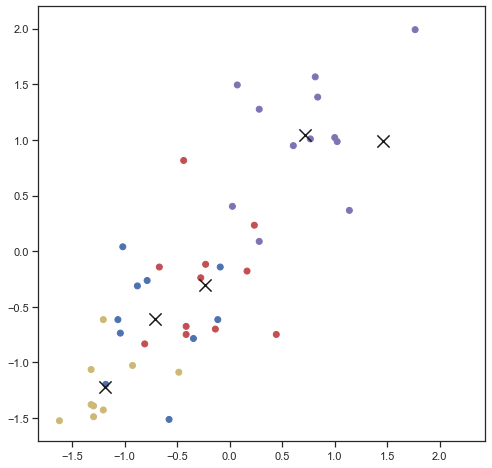

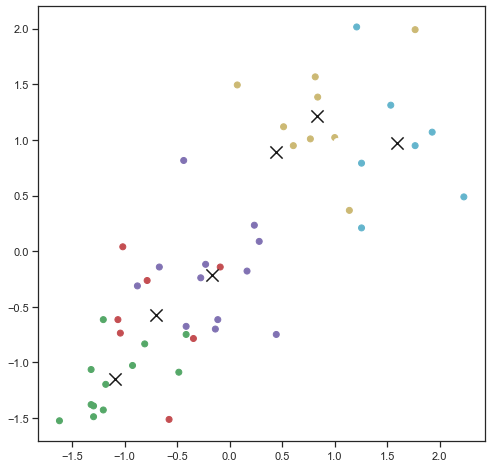

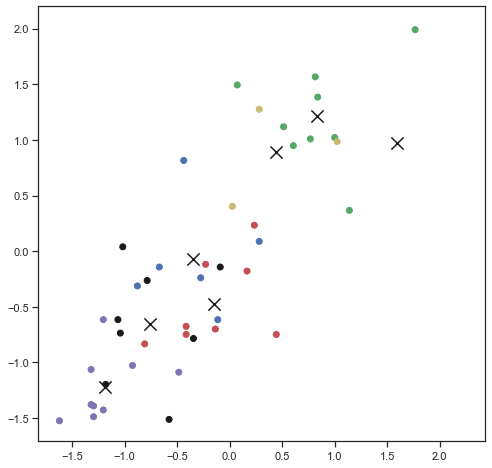

In [70]:
#numero de Ks a probar
K_MAX = 8
#creamos un array de K_MAX posciones donde almacenaremos los valores Davies Boulding, inicialmente repleto de 0.
davies_boulding = np.zeros(K_MAX - 2)

for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(array_data)
    plot_clusters(array_data, km.labels_, km.cluster_centers_)
    
    davies_boulding[k-2] = davies_bouldin_score(array_data, km.labels_) 
    

In [71]:
davies_boulding

array([0.96971867, 1.06401018, 0.99696684, 1.11800868, 1.13145865,
       1.19706257])

In [72]:
np.amin(davies_boulding)

0.9697186749933391

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

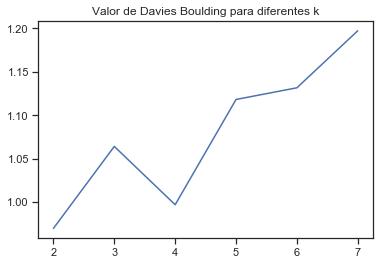

In [73]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

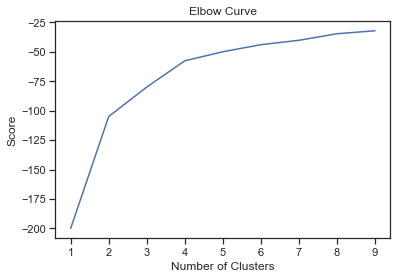

In [74]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(array_data).score(array_data) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

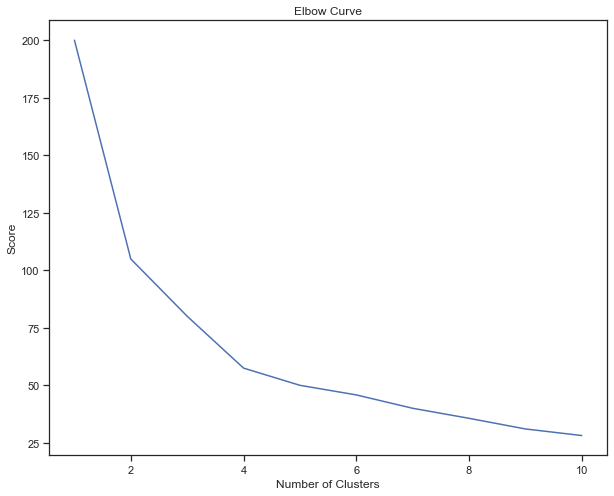

In [75]:
plt.figure(figsize=(10,8))
score=[]
for i in range (1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=333)
    kmeans.fit(array_data)
    score.append(kmeans.inertia_)

plt.plot(range(1,11),score)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

#### Hemos usado dos técnicas para determinar el número de cluster más indicado. Por un lado, hemos usado el índice de Davies-Bouldin para determinar la dispersión de los puntos de cada cluster y a la vez la separación entre estos. Los dos valores mas bajos que hemos obtenido son para 2 y 4 clusters.
#### Por otro lado hemos aplicado el algoritmo Kmeans para un rango de clusters (1 a 11). Los valores obtenidos en las distintas iteraciones del algoritmo las hemos pintado en una gráfica. En el eje horizontal hemos pintado los valores de k (de 1 a 11) y en el eje vertical los valores devueltos por el algoritmo para cada uno de los k. Cuando k aumenta los centroides están más cerca de los centroides de los grupos. Las mejoras disminuirán, al principio rápidament, creando la forma de codo. Ese punto es el valor óptimo para k. En la gráfica de arriba podemos ver que ese valor es 4.
#### Por lo tanto, hemos concluido que el número de clusters más indicado es 4.

### 4. Da un sentido a cada uno de los clusters que has obtenido en el contexto del problema que representa el conjunto de datos. Si obtienes un número mayor de 4 clusters, comenta solamente los dos los dos más numerosos y los dos menos numerosos. Para analizar los clusters:


### Usa estadísticos descriptivos (número de individuos, media, desviación típica, mediana, cuartiles) para describir los clusters.

### Usa una matriz de gráficos de dispersión que pinte los clusters usando un color diferente para ver la separación de los clusters en función de cada par de variables de entrada. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se cofunden más? Para ello, usa la función seaborn.pair_plot de la librería de representación gráfica seaborn, como puedes ver en este ejemplo

## Describiendo los clusters

In [76]:
km = KMeans(init='random', n_clusters=4, random_state=333)
km.fit(array_data)
y_kmeans = km.fit_predict(array_data)
print(y_kmeans)
centers = km.cluster_centers_
centers

[3 1 1 3 1 1 2 2 1 3 2 0 1 2 0 2 0 3 0 1 2 1 0 3 1 0 0 1 0 2 1 1 3 0 2 2 2
 2 2 3 0 3 1 2 0 2 2 0 0 2]


array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [77]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)
data_crimes['cluster'] = cluster

In [78]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(data_crimes.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,3.6,78.5,52.1,12.2
2,10.8,257.4,76.0,33.2
3,5.7,138.9,73.9,18.8
4,13.9,243.6,53.8,21.4


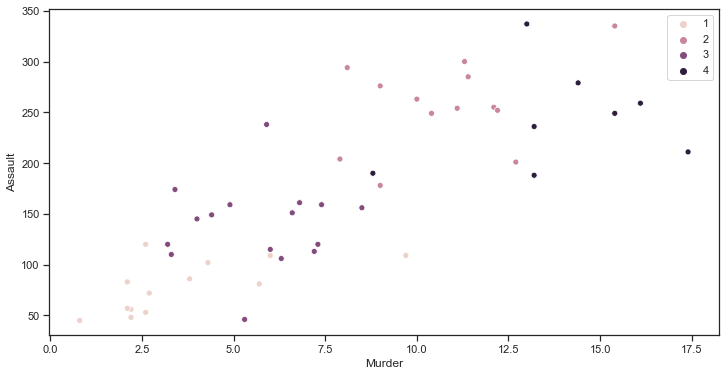

In [79]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=data_crimes['Murder'], y = data_crimes['Assault'],hue=y_kmeans1)


In [80]:
data_crimes[data_crimes['cluster']==1]

,Murder,Assault,UrbanPop,Rape,cluster
Idaho,2.6,120,54,14.2,1
Iowa,2.2,56,57,11.3,1
Kentucky,9.7,109,52,16.3,1
Maine,2.1,83,51,7.8,1
Minnesota,2.7,72,66,14.9,1
Montana,6.0,109,53,16.4,1
Nebraska,4.3,102,62,16.5,1
New Hampshire,2.1,57,56,9.5,1
North Dakota,0.8,45,44,7.3,1
South Dakota,3.8,86,45,12.8,1


In [86]:
len(data_crimes[data_crimes['cluster']==1])

13

In [81]:
data_crimes[data_crimes['cluster']==2]

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Florida,15.4,335,80,31.9,2
Illinois,10.4,249,83,24.0,2
Maryland,11.3,300,67,27.8,2
Michigan,12.1,255,74,35.1,2
Missouri,9.0,178,70,28.2,2
Nevada,12.2,252,81,46.0,2


In [87]:
len(data_crimes[data_crimes['cluster']==2])

13

In [82]:
data_crimes[data_crimes['cluster']==3]

,Murder,Assault,UrbanPop,Rape,cluster
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,3
Hawaii,5.3,46,83,20.2,3
Indiana,7.2,113,65,21.0,3
Kansas,6.0,115,66,18.0,3
Massachusetts,4.4,149,85,16.3,3
New Jersey,7.4,159,89,18.8,3
Ohio,7.3,120,75,21.4,3
Oklahoma,6.6,151,68,20.0,3
Oregon,4.9,159,67,29.3,3


In [88]:
len(data_crimes[data_crimes['cluster']==3])

16

In [83]:
data_crimes[data_crimes['cluster']==4]

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Arkansas,8.8,190,50,19.5,4
Georgia,17.4,211,60,25.8,4
Louisiana,15.4,249,66,22.2,4
Mississippi,16.1,259,44,17.1,4
North Carolina,13.0,337,45,16.1,4
South Carolina,14.4,279,48,22.5,4
Tennessee,13.2,188,59,26.9,4


In [89]:
len(data_crimes[data_crimes['cluster']==4])

8

In [91]:
%%HTML

<div class='tableauPlaceholder' id='viz1558006161579' style='position: relative'>
    <noscript>
    <a href='#'>
    <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1_rss.png' style='border: none' /></a>
    </noscript>

    <object class='tableauViz'  style='display:none;'>
    <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
    <param name='embed_code_version' value='3' />
    <param name='site_root' value='' />
    <param name='name' value='USCrimeRatesClusters&#47;Dashboard' />
    <param name='tabs' value='no' />
    <param name='toolbar' value='yes' />
    <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1.png' /> 
    <param name='animate_transition' value='yes' />
    <param name='display_static_image' value='yes' />
    <param name='display_spinner' value='yes' />
    <param name='display_overlay' value='yes' />
    <param name='display_count' value='yes' />
    </object>
</div>               
<script type='text/javascript'>                 
    var divElement = document.getElementById('viz1558006161579');                 
    var vizElement = divElement.getElementsByTagName('object')[0];                  
    vizElement.style.width='700px';
    vizElement.style.height='527px';                    
    var scriptElement = document.createElement('script');                   
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                   
    vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

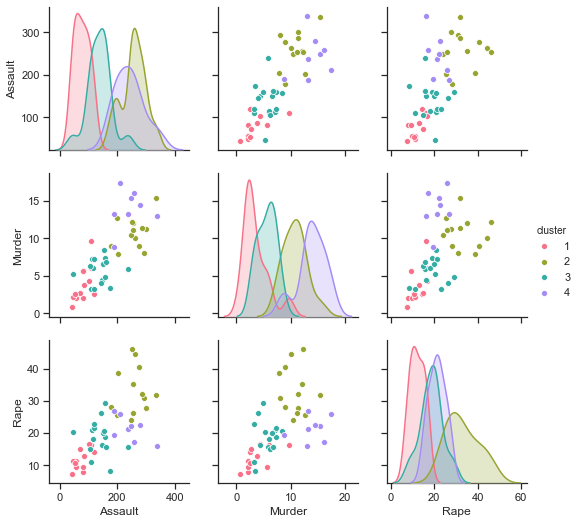

In [93]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data_crimes,vars=["Assault", "Murder", "Rape"], hue="cluster", palette="husl")

#### Tenemos 4 clusters: el cluster 1 representado en el mapa con el color roja, el cluster 2 con amarillo, el cluster 3 con verde azulado y el cluster 4 con verde oliva. El primer cluster contiene 13 estados, el segundo 13, el tercero 16 y el cuarto 8, por lo tanto el tercero cluster es el más numeroso y el cuarto el menos numeroso. El cuarto representa los estados con criminalidad alta y el primero representa los estados con criminalidad baja. El segundo cluster se confunde mucho con el cuarto, teniendo valores muy proximos, en cambio el tercero contiene valore medios entre los 2 clusters más differenciados. 


#### Si los comparamos en función de la homogéneidad:
####    - tomando en cuenta el par de variables Rape/Assault el mas homogéneo es el primero. El primero sigue siendo el más homogéneo aunque elijamos los pares Murder/Assault y Murder/Rape aunque en estos casos aparecen algunos outliers 
####    - el cluster 2 es el más dispero al tomar las variables Murder/Rape y Rape/Assault. En cambio al tomar Assault/Murder parece mas compacto pero presenta algunos valores mas alejados.
####    - el cluster 4 parece tener más homogéneidad al tomar las variables Assault/Rape (aunque aparecen algunos outliers) y ser un poco más disperso al utilizar Murder/Rape y Assault/Murder.
####    - sobre el tercer cluster podemos decir que es el que más valores alejados presenta y los datos no parecen muy homogéneos pero tampoco muy dispersos
#### Como podemos ver en las gráficas los 2 clusters que se separan mejor son el 1 y el 4 si tomamos como referencia el par de variables Assault/Murder, pero si tenemos en cuenta Murder/Rape el primero se separa mejor del segundo.
#### Por otro lado los clusters que se confunden al tomar Assault/Rape y Murder/Rape son el primero y el tercero. Podemos decir lo mismo del tercero y el cuarto y usamos el par Assault/Rape. 
#### Por lo tanto podemos decir que en este caso los clusters nos están del todo diferenciados.




